In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import pickle
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,classification_report

In [2]:
df = pd.read_csv('students_placement.csv')

In [3]:
df.head()

,cgpa,iq,profile_score,placed
0,5.97,106,61,0
1,6.83,113,77,0
2,6.60,110,61,0
3,5.54,113,68,0
4,6.84,102,67,0


In [4]:
df.dtypes

cgpa             float64
iq                 int64
profile_score      int64
placed             int64
dtype: object

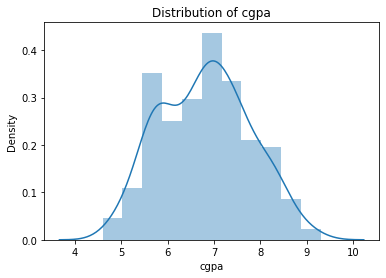

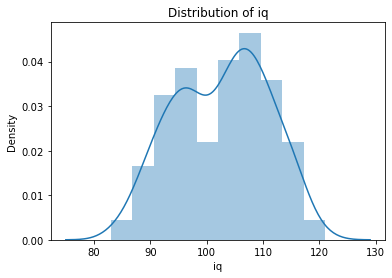

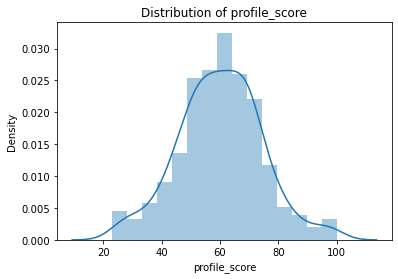

In [5]:
sns.distplot(df['cgpa'])
plt.title('Distribution of cgpa')
plt.show()

sns.distplot(df['iq'])
plt.title('Distribution of iq')
plt.show()

sns.distplot(df['profile_score'])
plt.title('Distribution of profile_score')
plt.show()

<AxesSubplot:>

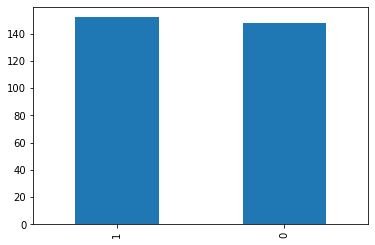

In [6]:
df['placed'].value_counts().plot(kind='bar')

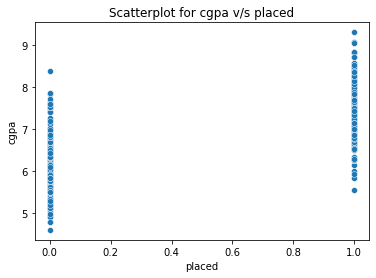

In [7]:
sns.scatterplot(x='placed',y='cgpa',data=df)
plt.title('Scatterplot for cgpa v/s placed')
plt.show()

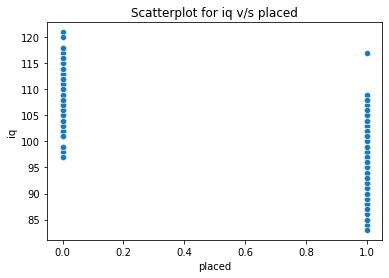

In [8]:
sns.scatterplot(x='placed',y='iq',data=df)
plt.title('Scatterplot for iq v/s placed')
plt.show()

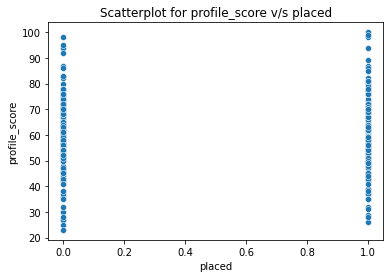

In [9]:
sns.scatterplot(x='placed',y='profile_score',data=df)
plt.title('Scatterplot for profile_score v/s placed')
plt.show()

<AxesSubplot:xlabel='cgpa', ylabel='iq'>

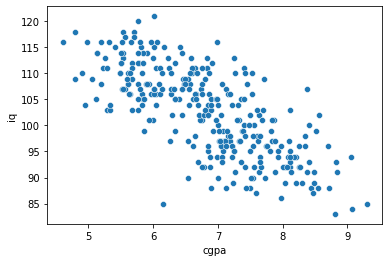

In [10]:
sns.scatterplot(x='cgpa',y='iq',data=df)

<AxesSubplot:xlabel='cgpa', ylabel='profile_score'>

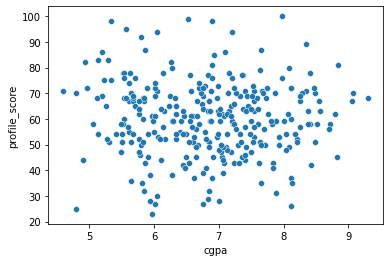

In [11]:
sns.scatterplot(x='cgpa',y='profile_score',data=df)

<AxesSubplot:xlabel='iq', ylabel='profile_score'>

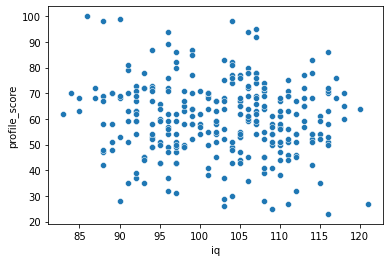

In [12]:
sns.scatterplot(x='iq',y='profile_score',data=df)

<AxesSubplot:>

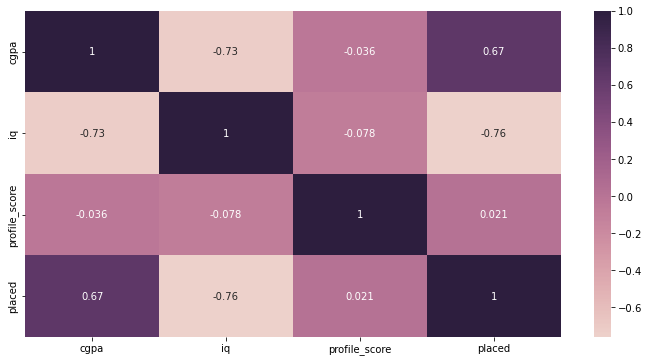

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True))

# Model Building

In [14]:
X = df.drop('placed',axis=1)
y = df['placed']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [16]:
df.columns

Index(['cgpa', 'iq', 'profile_score', 'placed'], dtype='object')

In [17]:
# Create a list of classifiers with their names
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC(kernel='rbf')),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', XGBClassifier())
]

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy'])

# Loop through each classifier, train, and evaluate
for name, classifier in classifiers:
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)

    # Append results to the DataFrame
    results_df = results_df.append({'Model': name, 'Accuracy': accuracy}, ignore_index=True)

# Print the results
print(results_df)


                    Model  Accuracy
0     Logistic Regression  0.950000
1           Decision Tree  0.883333
2           Random Forest  0.950000
3  Support Vector Machine  0.950000
4             Naive Bayes  0.950000
5                 XGBoost  0.916667


# Hyperparameter Tuning

In [18]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.9666666666666667


# Model Building after Scaling

In [19]:
# Create a StandardScaler object to scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Create a list of classifiers with their names
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(max_depth=None, min_samples_split= 10,n_estimators= 200)),
    ('Support Vector Machine', SVC()),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', XGBClassifier())
]

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy'])

# Loop through each classifier, train, and evaluate
for name, classifier in classifiers:
    classifier.fit(X_train_scaled,y_train)
    y_pred = classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test,y_pred)

    # Append results to the DataFrame
    results_df = results_df.append({'Model': name, 'Accuracy': accuracy}, ignore_index=True)

# Print the results
print(results_df)



                    Model  Accuracy
0     Logistic Regression  0.933333
1           Decision Tree  0.866667
2           Random Forest  0.950000
3  Support Vector Machine  0.966667
4             Naive Bayes  0.933333
5                 XGBoost  0.916667


In [20]:
rf = RandomForestClassifier(max_depth=None, min_samples_split= 10,n_estimators= 200)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9666666666666667

In [21]:
pickle.dump(rf,open('model.pkl','wb'))